<a href="https://colab.research.google.com/github/PedroFlorencioNeto/power-distribution/blob/main/PandaPowerAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://drive.google.com/uc?export=view&id=1D4Q-wjSrnO7C6gOF-jnflQJR7Ch21o_F)

---

<center><h3></h3>
<h3><b>Trabalho 01: Análise de Dados em Sistemas de Distribuição<br><h4><b>Distribuição de Energia Elétrica - TH0197</b></h4></b></h3></center>

Este notebook apresenta os resultados da análise dos ramais de baixa tensão propostos como objeto de estudo na disciplina Distribuição de Energia Elétrica do Departamento de Engenharia Elétrica da Universidade Federal do Ceará.

Pedro Florencio de Almeida Neto - 389276

<i>pedroflorencio@alu.ufc.br</i>

Fortaleza, 16 de maio de 2024

---

#### **1. Introdução Teórica**


**1.1. Sistema de Distribuição**

O sistema de distribuição é o trecho do sistema elétrico de potência que transfere eletricidade do sistema de transmissão e entrega aos consumidores (Figura 01). Pode ser descrito como todo sistema que é radial ou com nível de tensão abaixo de 35kV. Um sistema de distribuição típico é composto por:
* Subestações de distribuição;
* Alimentadores primários;
* Transformadores de distribuição;
* Alimentadores secundários;
* Condutores.

**Figura 01:** Visão Geral do Sistema Elétrico de Potência. Extraído de: Electric Power Distribution Handbook <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1).

![](https://drive.google.com/uc?export=view&id=1GOZwK67tO0dycHeMORpE8R6tsCpM3iml)


**1.2. Sistema de Subtransmissão**
<br>É o trecho composto por redes que interligam subestações de subtransmissão às subestações de distribuição. São caracterizadas por linhas trifásicas, aéreas com configuração anel fechado e tensão de subtransmissão de 128 kV ou 69 kV, ou mais raramente 34,5 kV.

**1.3. Subestação de Distribuição**
<br>São responsáveis pela transformação da tensão de subtransmissão (69 kV, no Ceará) para a de distribuição primária (13,8 kVA, no Ceará).

**1.4. Distribuição Primária**
<br>São redes de distribuição de energia elétrica em média tensão, que operam radialmente com possibilidade de transferência de blocos de carga entre circuitos. Esta rede atende os transformadores de distribuição (baixa tensão) e os consumidores primários (média tensão), podendo ser áereas ou subterrâneas.

**1.5. Transformador de Distribuição**
<br>São os componentes responsáveis por reduzir a tensão primária (13,8 kV, por exemplo), para a tensão secundária (380/220 V, por exemplo). Em geral, são utilizados transformadores trifásicos, com resfriamento a óleo, delta-estrela com centro estrela aterrado.

**1.6. Distribuição Secundária**
<br>É oriunda dos transformadores de distribuição, suprindo os consumidores de baixa tensão (380/220 V, no Ceará). É neste trecho que encontra-se a maioria das conexões de geração distribuída, e usualmente não conta com recurso para o atendimento de contigências.

#### **2. Objetivos**

**Parte 1:**

Utilizando a biblioteca Python Simbench carregue a rede com o seguinte código: `1-LV-rural3-all-0-sw`

Realize as seguintes tarefas utilizando os dados da rede elétrica carregada:

1. Gere uma tabela e um gráfico de fatores de diversidade até o número máximo de consumidores presentes na rede elétrica. Utilize a metodologia de cálculo baseada em amostras de 30 consumidores para cada ponto da curva de fator de diversidade.

2. Execute o fluxo de carga para a rede e verifique suas condições operacionais (tensões e carregamento dos condutores) para o momento de pico do sistema.

3. Plote o gráfico de demanda elétrica vs. energia elétrica para o conjunto de prosumidores da rede.

**Parte 2:**

Carregue a rede com o seguinte código: `1-LV-rural1-all-0-sw`

1. Utilize o gráfico gerado no item 3 da parte 1 para calcular as demandas máximas de cada consumidor e compare com o valor real.

2. Com os valores estimados de demanda máxima de cada consumidor calcule a demanda máxima não-coincidente.

3. Com o valor de demanda máxima não coincidente encontrado no item anterior estime o valor de demanda máxima diversificada por meio da tabela de fatores de diversidade encontrada no item 1 da parte 1. Compare com o valor real de demanda diversificada para esta rede.

**Parte 3 (Bônus):**

Carregue a rede com o seguinte código: `1-MV-rural–0-sw`

1. Utilize o método de alocação baseado em potência dos transformadores para obter os fluxos de potência na rede elétrica.

2. Substitua esses valores nas cargas e execute o fluxo de carga.

3. Execute o fluxo de carga na rede real no momento da demanda máxima e compare com os resultados reais.

#### **3. Metodologia**


##### **Parte 1**

###### **3.1. Importação das Bibliotecas**

In [ ]:
%%capture
!pip install tqdm
!pip install simbench
!pip install pandapower

In [ ]:
import numpy as np
import pandas as pd
import simbench as sb
import seaborn as sns
import pandapower as pp
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandapower.plotting as plot
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

%matplotlib inline

###### **3.2. Acesso a Rede Simbench**

As características da rede escolhida são contidas na codificação disponibilizada pela framework Simbench (Figura 02). Os níveis contidos são de baixa tensão (LV), com característica rural e considerando-se um cenário presente.


<br>**Figura 02:** Sistema de codificação no Simbench. Disponível em: [SimBench Grid Usage Examples](https://github.com/e2nIEE/simbench/blob/master/tutorials/simbench_grids_basics_and_usage.ipynb)
![](https://drive.google.com/uc?export=view&id=1Vqi9aNVPG-WQKYywQXXhabIihHMfvzdo
)



In [ ]:
sb_code = '1-LV-rural3-all-0-sw'
net = sb.get_simbench_net(sb_code)

In [ ]:
net

This pandapower network includes the following parameter tables:
   - bus (129 elements)
   - load (118 elements)
   - sgen (17 elements)
   - switch (256 elements)
   - ext_grid (1 element)
   - line (127 elements)
   - trafo (1 element)
   - bus_geodata (129 elements)
   - loadcases (6 elements)

A rede conta com 118 consumidores (cargas).

In [ ]:
net.bus.head()

,name,vn_kv,type,zone,in_service,max_vm_pu,substation,subnet,voltLvl,min_vm_pu
0,LV3.101 Bus 1,0.4,b,NaN,True,1.1,NaN,LV3.101,7,0.9
1,LV3.101 Bus 50,0.4,b,NaN,True,1.1,NaN,LV3.101,7,0.9
2,LV3.101 Bus 61,0.4,b,NaN,True,1.1,NaN,LV3.101,7,0.9
3,LV3.101 Bus 72,0.4,b,NaN,True,1.1,NaN,LV3.101,7,0.9
4,LV3.101 Bus 83,0.4,b,NaN,True,1.1,NaN,LV3.101,7,0.9


###### **3.3. Visualização da Rede**

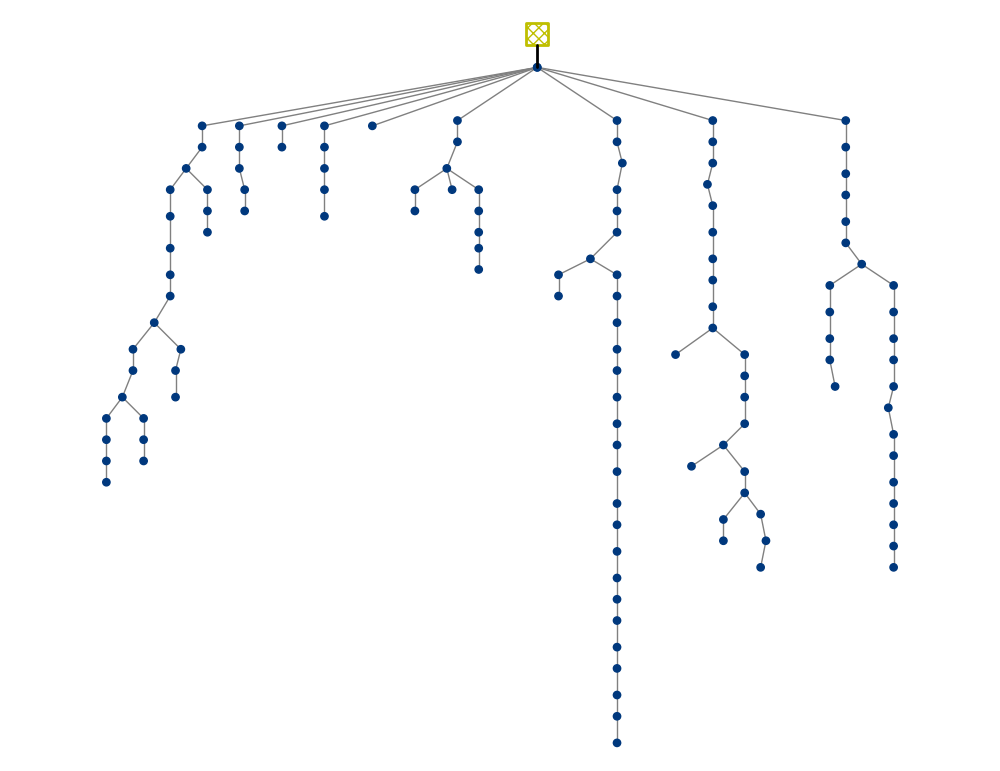

In [ ]:
plot.simple_plot(net, bus_size=0.5, bus_color='#00387D')
plt.show()

###### **3.4. Fatores de Diversidade da Rede**

Gere uma tabela e um gráfico de fatores de diversidade até o número máximo de consumidores presentes na rede elétrica.

**Definição:** O fator de diversidade é a razão entre a **Demanda Máxima Não Coincidente** e a **Demanda Máxima Diversificada**.

**Demanda Máxima Não-Coincidente**

**Definição:** A Demanda Máxima Não Coincidente é a soma das demandas máximas de cada um dos consumidores de um determinado ramal.

**Aplicação de Valores Absolutos nos Perfis de Carga**

Adicionando resolução temporal aos dados de cargas.<br>
**Período escolhido:** 1 mês.

In [ ]:
def apply_absolute_values(net, absolute_values_dict, case_or_time_step):

    # loop nas chaves do dicionario de valores absolutos passado como parâmetro
    for elm_param in absolute_values_dict.keys():

        # verifica se o valor correspondente da chave do dicionario tem tamanho 1
        if absolute_values_dict[elm_param].shape[1]:
            elm = elm_param[0] # elemento: carga/geracao
            param = elm_param[1] # parametro: MW, MVAr
            net[elm].loc[:, param] = absolute_values_dict[
                                     elm_param].loc[
                                     case_or_time_step]

In [ ]:
# calcula os perfis de carga em valores absolutos
profiles = sb.get_absolute_values(net, profiles_instead_of_study_cases=True)

In [ ]:
# carrega o dataframe de dados a serem utilizados nos cálculos dos parâmetros
time_steps = range(3 * 30 * 96, 4 * 30 * 96)
results_lv = pd.DataFrame([],
                          index = time_steps,
                          columns = net.load.name[net.load.name.str.contains('LV')])

for time_step in tqdm(time_steps):
    apply_absolute_values(net, profiles, time_step)
    pp.runpp(net)
    for i, load in enumerate(net.load.name[net.load.name.str.contains('LV')]):
        results_lv.loc[time_step, load] = net.res_load.p_mw[i]

  0%|          | 0/2880 [00:00<?, ?it/s]

In [ ]:
results_lv.head()

name,LV3.101 Load 1,LV3.101 Load 31,LV3.101 Load 42,LV3.101 Load 53,LV3.101 Load 64,LV3.101 Load 75,LV3.101 Load 86,LV3.101 Load 97,LV3.101 Load 108,LV3.101 Load 2,LV3.101 Load 13,LV3.101 Load 23,LV3.101 Load 24,LV3.101 Load 25,LV3.101 Load 26,LV3.101 Load 27,LV3.101 Load 28,LV3.101 Load 29,LV3.101 Load 30,LV3.101 Load 32,LV3.101 Load 33,LV3.101 Load 34,LV3.101 Load 35,LV3.101 Load 36,LV3.101 Load 37,LV3.101 Load 38,LV3.101 Load 39,LV3.101 Load 40,LV3.101 Load 41,LV3.101 Load 43,LV3.101 Load 44,LV3.101 Load 45,LV3.101 Load 46,LV3.101 Load 47,LV3.101 Load 48,LV3.101 Load 49,LV3.101 Load 50,LV3.101 Load 51,LV3.101 Load 52,LV3.101 Load 54,LV3.101 Load 55,LV3.101 Load 56,LV3.101 Load 57,LV3.101 Load 58,LV3.101 Load 59,LV3.101 Load 60,LV3.101 Load 61,LV3.101 Load 62,LV3.101 Load 63,LV3.101 Load 65,LV3.101 Load 66,LV3.101 Load 67,LV3.101 Load 68,LV3.101 Load 69,LV3.101 Load 70,LV3.101 Load 71,LV3.101 Load 72,LV3.101 Load 73,LV3.101 Load 74,LV3.101 Load 76,LV3.101 Load 77,LV3.101 Load 78,LV3.101 Load 79,LV3.101 Load 80,LV3.101 Load 81,LV3.101 Load 82,LV3.101 Load 83,LV3.101 Load 84,LV3.101 Load 85,LV3.101 Load 87,LV3.101 Load 88,LV3.101 Load 89,LV3.101 Load 90,LV3.101 Load 91,LV3.101 Load 92,LV3.101 Load 93,LV3.101 Load 94,LV3.101 Load 95,LV3.101 Load 96,LV3.101 Load 98,LV3.101 Load 99,LV3.101 Load 100,LV3.101 Load 101,LV3.101 Load 102,LV3.101 Load 103,LV3.101 Load 104,LV3.101 Load 105,LV3.101 Load 106,LV3.101 Load 107,LV3.101 Load 109,LV3.101 Load 110,LV3.101 Load 111,LV3.101 Load 112,LV3.101 Load 113,LV3.101 Load 114,LV3.101 Load 115,LV3.101 Load 116,LV3.101 Load 117,LV3.101 Load 118,LV3.101 Load 3,LV3.101 Load 4,LV3.101 Load 5,LV3.101 Load 6,LV3.101 Load 7,LV3.101 Load 8,LV3.101 Load 9,LV3.101 Load 10,LV3.101 Load 11,LV3.101 Load 12,LV3.101 Load 14,LV3.101 Load 15,LV3.101 Load 16,LV3.101 Load 17,LV3.101 Load 18,LV3.101 Load 19,LV3.101 Load 20,LV3.101 Load 21,LV3.101 Load 22
8640,0.000246,0.000062,0.000122,0.000049,0.000049,0.000049,0.000246,0.000255,0.000062,0.000246,0.000122,0.000324,0.000062,0.000324,0.000246,0.000093,0.000062,0.000216,0.000216,0.000216,0.000216,0.000049,0.000124,0.000122,0.000324,0.000324,0.000049,0.000062,0.000324,0.000049,0.000246,0.000328,0.001411,0.000093,0.000246,0.000049,0.000049,0.000122,0.000183,0.000062,0.000073,0.000164,0.000122,0.000164,0.000164,0.000164,0.000093,0.001329,0.000164,0.000246,0.000216,0.000122,0.000093,0.000049,0.000183,0.000324,0.000062,0.000246,0.000049,0.000124,0.000287,0.000216,0.000183,0.000062,0.000216,0.000093,0.000164,0.000049,0.000073,0.000324,0.000062,0.000324,0.002145,0.000216,0.000093,0.000093,0.000216,0.000216,0.000049,0.000122,0.000093,0.000122,0.000049,0.000093,0.000183,0.000062,0.000093,0.000122,0.000216,0.000093,0.000049,0.000093,0.000328,0.000073,0.000183,0.000164,0.000093,0.000049,0.000062,0.000062,0.000164,0.000216,0.000122,0.000122,0.000324,0.000093,0.000073,0.000216,0.000093,0.000122,0.000073,0.000164,0.000062,0.000073,0.000246,0.000216,0.000073,0.000093
8641,0.000219,0.000056,0.000118,0.000083,0.000083,0.000083,0.000219,0.000234,0.000056,0.000219,0.000118,0.000151,0.000056,0.000151,0.000219,0.000084,0.000056,0.000101,0.000101,0.000101,0.000101,0.000083,0.000112,0.000118,0.000151,0.000151,0.000083,0.000056,0.000151,0.000083,0.000219,0.000292,0.001236,0.000084,0.000219,0.000083,0.000083,0.000118,0.000177,0.000056,0.000124,0.000146,0.000118,0.000146,0.000146,0.000146,0.000084,0.001353,0.000146,0.000219,0.000101,0.000118,0.000084,0.000083,0.000177,0.000151,0.000056,0.000219,0.000083,0.000112,0.000263,0.000101,0.000177,0.000056,0.000101,0.000084,0.000146,0.000083,0.000124,0.000151,0.000056,0.000151,0.002039,0.000101,0.000084,0.000084,0.000101,0.000101,0.000083,0.000118,0.000084,0.000118,0.000083,0.000084,0.000177,0.000056,0.000084,0.000118,0.000101,0.000084,0.000083,0.000084,0.000292,0.000124,0.000177,0.000146,0.000084,0.000083,0.000056,0.000056,0.000146,0.000101,0.000118,0.000118,0.000151,0.000084,0.000124,0.000101,0.000084,0.000118,0.000124,0.000146,0.000056,0.000124

**Demanda máxima de cada carga**

In [ ]:
demanda_max_loads = results_lv.max(axis=0)
demanda_max_loads

name
LV3.101 Load 1      0.002412
LV3.101 Load 31     0.001326
LV3.101 Load 42     0.001667
LV3.101 Load 53     0.000838
LV3.101 Load 64     0.000838
LV3.101 Load 75     0.000838
LV3.101 Load 86     0.002412
LV3.101 Load 97      0.00682
LV3.101 Load 108    0.001326
LV3.101 Load 2      0.002412
LV3.101 Load 13     0.001667
LV3.101 Load 23     0.002113
LV3.101 Load 24     0.001326
LV3.101 Load 25     0.002113
LV3.101 Load 26     0.002412
LV3.101 Load 27     0.001989
LV3.101 Load 28     0.001326
LV3.101 Load 29     0.001409
LV3.101 Load 30     0.001409
LV3.101 Load 32     0.001409
LV3.101 Load 33     0.001409
LV3.101 Load 34     0.000838
LV3.101 Load 35     0.002652
LV3.101 Load 36     0.001667
LV3.101 Load 37     0.002113
LV3.101 Load 38     0.002113
LV3.101 Load 39     0.000838
LV3.101 Load 40     0.001326
LV3.101 Load 41     0.002113
LV3.101 Load 43     0.000838
LV3.101 Load 44     0.002412
LV3.101 Load 45     0.003216
LV3.101 Load 46     0.009108
LV3.101 Load 47     0.001989
LV3.101 L

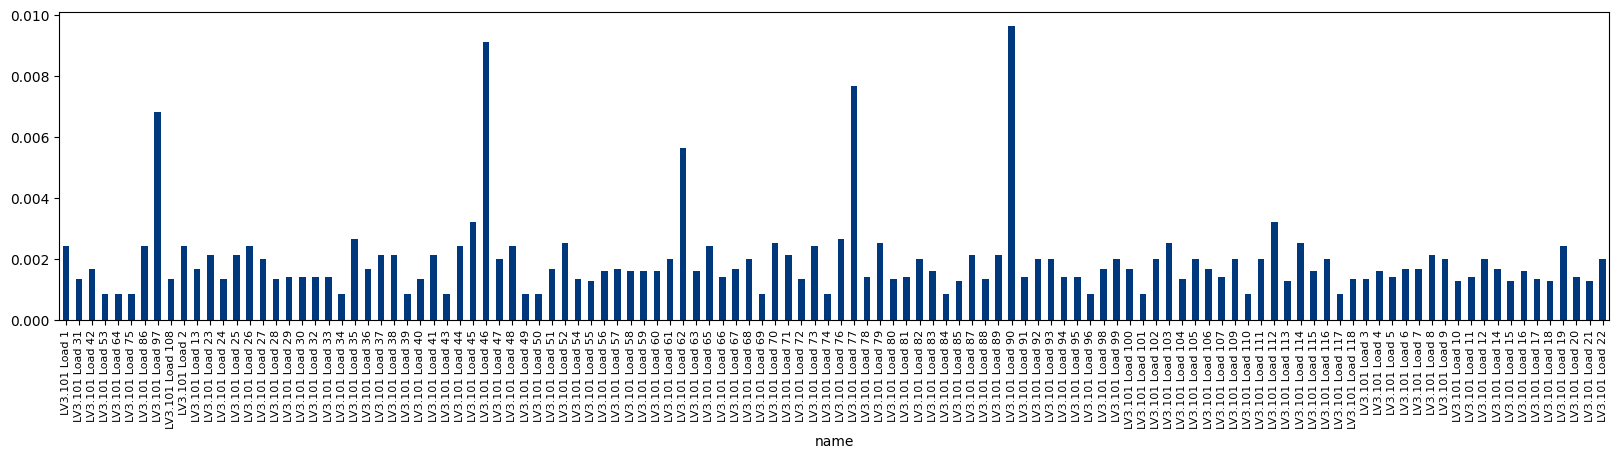

In [ ]:
plt.figure(figsize=(20,4))

demanda_max_loads.plot(kind='bar', color='#00387D')

plt.rcParams['xtick.labelsize'] = 6

plt.show()

In [ ]:
print(f'A Demanda Máxima Não Coincidente é {round(demanda_max_loads.sum(),4)} MW')

A Demanda Máxima Não Coincidente é 0.2285 MW


**Demanda Máxima Diversificada**

**Definição:** A Demanda Máxima Diversificada é a maior carga solicitada por um consumidor no agrupamento, em um determinado período de tempo.

In [ ]:
dmd = demanda_max_loads.max()

print(f'A Demanda Máxima Diversificada é {round(dmd,4)} MW')

A Demanda Máxima Diversificada é 0.0096 MW


In [ ]:
diversity_factor = []
num_customers = range(1,len(results_lv.columns))

for customer in num_customers:

    # recortando no Dataframe das cargas do ramal
    df_recorte = results_lv.iloc[:,1:customer+1]

    # cálculo das demandas que compõem o fator de diversidade
    demanda_max_nao_coinc = df_recorte.max(axis=0).sum()
    demanda_max_diversificada = df_recorte.sum(axis=1).max()
    fator_diversidade = demanda_max_nao_coinc/demanda_max_diversificada

    # guardando o fator calculado na lista "diversity_factor"
    diversity_factor.append(fator_diversidade)

In [ ]:
# lista com a quantidade de consumidores
qtde_consumidores = list(np.arange(1,118))

In [ ]:
# gerando Dataframe para plotar a curva
df_fator_diversidade = pd.DataFrame({'numero-consumidores':qtde_consumidores, 'fator-de-diversidade':diversity_factor})

**Tabela dos Fatores de Diversidade**

In [ ]:
df_fator_diversidade

,numero-consumidores,fator-de-diversidade
0,1,1.000000
1,2,1.454375
2,3,1.818368
3,4,1.867912
4,5,1.725905
5,6,1.952018
6,7,1.593638
7,8,1.643171
8,9,1.821081
9,10,1.860609


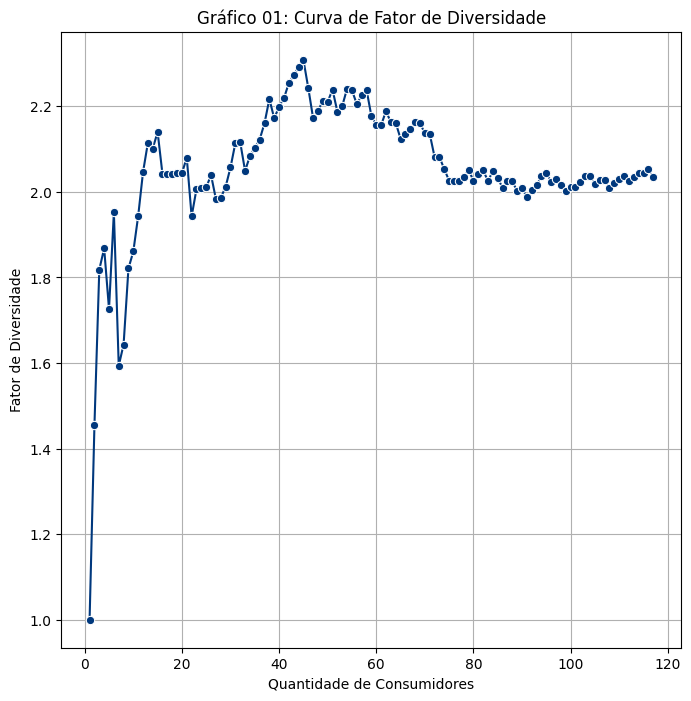

In [ ]:
plt.figure(figsize=(8,8))

sns.lineplot(data=df_fator_diversidade,
             x='numero-consumidores',
             y='fator-de-diversidade',
             marker='o',
             color='#00387D')

plt.grid(True)
plt.title('Gráfico 01: Curva de Fator de Diversidade')
plt.ylabel('Fator de Diversidade')
plt.xlabel('Quantidade de Consumidores')
plt.rcParams['xtick.labelsize'] = 10

plt.show()

###### **3.5. Cálculo dos Fatores de Diversidade - Amostragem**

Utilize a metodologia de cálculo baseada em amostras de 30 consumidores para cada ponto da curva de fator de diversidade

In [ ]:
loads = results_lv.T
loads.reset_index(inplace=True)

In [ ]:
loads.shape[0]

118

  0%|          | 0/118 [00:00<?, ?it/s]

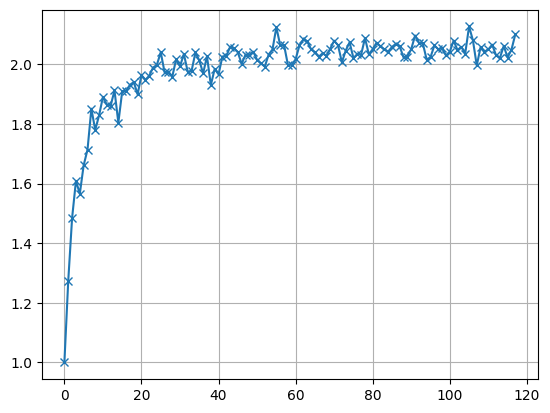

In [ ]:
fd_list = []

for i in tqdm(range(0, results_lv.columns.size)):
    samples = []
    sample_number = 30 #numero de amostras para calculo

    # processo de amostragem
    for j in range(sample_number):
        sample = results_lv.iloc[:, np.random.randint(0, results_lv.columns.size, i+1)]
        samples.append(sample)

    # processo de calculo de media das amostras de FD
    fd_list_parcial = []
    dmaxncon = 0.0
    for i, sample in enumerate(samples):
        dmaxdiv = sample.sum(axis=1).max() # calculo da demanda diversificada maxima
        dmaxncon = sample.max().sum() # calculo da demanda diversificada nao-coincidente
        fd = dmaxncon / dmaxdiv # calculo do fator de diversidade
        fd_list_parcial.append(fd)

    fd_list.append(np.array(fd_list_parcial).mean()) # armazenando a media na lista de FD

plt.grid(True)

plt.plot(fd_list, 'x-')

###### **3.6. Fluxo de Carga no Pico do Sistema**

Verificando as condições operacionais (tensões e carregamento dos condutores) para o momento de pico do sistema.

**Demanda diversificada**

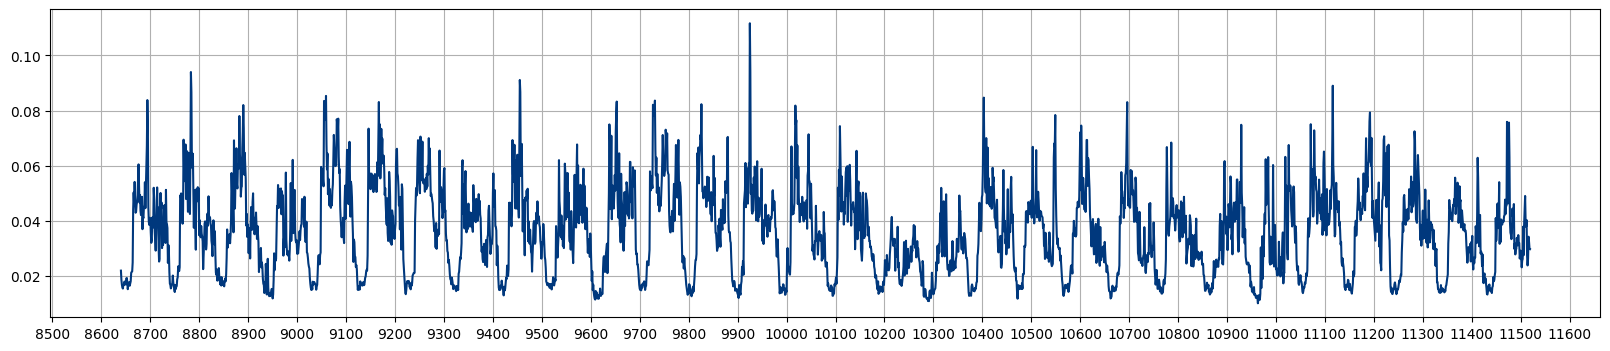

In [ ]:
plt.figure(figsize=(20,4))

_ = results_lv.sum(axis=1).plot(grid=True, kind='line', color='#00387D')

plt.xticks(ticks=np.arange(8500,11700,100))

plt.show()

In [ ]:
# demanda diversificada maxima
print(results_lv.sum(axis=1).max())

0.11169339100000002


In [ ]:
posicao = results_lv.sum(axis=1).to_numpy().argmax()
posicao

1285

In [ ]:
pp.run.runpp(net)

In [ ]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.023421,-150.245681,0.000378,-0.000021
1,1.022479,-150.268060,0.000064,0.000009
2,1.021505,-150.230123,0.000000,0.000000
3,1.022739,-150.240305,0.000252,-0.000014
4,1.022840,-150.240540,0.000132,-0.000011
5,1.023393,-150.245934,0.000132,-0.000011
6,1.022270,-150.272777,0.000401,0.000014
7,1.022786,-150.258794,0.000000,0.000000
8,1.023432,-150.245619,0.000198,-0.000017
9,1.022553,-150.266318,0.000198,-0.000017


In [ ]:
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,0.000384,-2.564616e-05,-0.000384,2.558792e-05,2.437517e-10,-5.824091e-08,0.000543,0.000543,0.000543,1.023679,-150.239031,1.023678,-150.239047,0.201043
1,-0.001623,8.479798e-05,0.001623,-8.486343e-05,5.039882e-09,-6.544607e-08,0.002293,0.002293,0.002293,1.022556,-150.266249,1.022559,-150.266170,0.849428
2,-0.004580,-1.914779e-03,0.004580,1.914500e-03,2.668099e-07,-2.790000e-07,0.007005,0.007004,0.007005,1.022840,-150.240540,1.022899,-150.240623,2.594261
3,0.003297,1.953645e-03,-0.003297,-1.953925e-03,1.391437e-07,-2.799351e-07,0.005411,0.005411,0.005411,1.022226,-150.237746,1.022186,-150.237381,2.004183
4,0.000653,-1.504284e-06,-0.000653,3.785694e-07,1.364387e-08,-1.125715e-06,0.000922,0.000922,0.000922,1.023107,-150.253142,1.023085,-150.253609,0.341373
5,0.000190,1.407737e-05,-0.000190,-1.432902e-05,2.576467e-10,-2.516465e-07,0.000269,0.000269,0.000269,1.023642,-150.240856,1.023640,-150.240880,0.099488
6,-0.002905,8.282443e-05,0.002905,-8.323923e-05,1.093421e-07,-4.147988e-07,0.004102,0.004102,0.004102,1.022714,-150.262277,1.022752,-150.261377,1.519201
7,-0.005478,9.664192e-05,0.005478,-9.678578e-05,1.820405e-07,-1.438625e-07,0.007728,0.007728,0.007728,1.023206,-150.250845,1.023240,-150.250071,2.862366
8,0.001800,-4.715603e-05,-0.001800,4.620359e-05,9.103564e-08,-9.524406e-07,0.002544,0.002544,0.002544,1.021644,-150.287760,1.021593,-150.288962,0.942168
9,0.000132,-1.355065e-05,-0.000132,1.122985e-05,1.156294e-09,-2.320798e-06,0.000187,0.000187,0.000187,1.022491,-150.239229,1.022482,-150.239469,0.069388


In [ ]:
# verificar as tensões dos barramentos
print('Tensão máxima:', net.res_bus.vm_pu.max(),'kW')
print('Tensão mínima:', net.res_bus.vm_pu.min(),'kW')

# verificar o carregamento dos condutores
print('Carregamento dos condutores:', net.res_line.loading_percent.max())

Tensão máxima: 1.025 kW
Tensão mínima: 1.021308170098539 kW
Carregamento dos condutores: 3.580911403468708


###### **3.7. Gráfico de Demanda Elétrica vs. Energia Elétrica**

In [ ]:
# dataframe com a demanda máxima de cada consumidor
df_energia_demanda = results_lv.max(axis=0).reset_index()

# renomeando coluna relativa a demanda
df_energia_demanda.rename(columns={0:'demand'}, inplace=True)

# renomeando a coluna relativa aos consumidores
df_energia_demanda.rename(columns={'name':'customer'}, inplace=True)

# adição da coluna com a energia
df_energia_demanda['energy'] = (results_lv*(1/4)).sum(axis=0).reset_index()[0]

df_energia_demanda.head(20)

,customer,demand,energy
0,LV3.101 Load 1,0.002412,0.272196
1,LV3.101 Load 31,0.001326,0.128705
2,LV3.101 Load 42,0.001667,0.09971
3,LV3.101 Load 53,0.000838,0.073703
4,LV3.101 Load 64,0.000838,0.073703
5,LV3.101 Load 75,0.000838,0.073703
6,LV3.101 Load 86,0.002412,0.272196
7,LV3.101 Load 97,0.00682,1.050204
8,LV3.101 Load 108,0.001326,0.128705
9,LV3.101 Load 2,0.002412,0.272196


In [ ]:
# convertendo para kW
df_energia_demanda['demand'] = df_energia_demanda['demand']*1000
df_energia_demanda['energy'] = df_energia_demanda['energy']*1000

In [ ]:
df_energia_demanda.head()

,customer,demand,energy
0,LV3.101 Load 1,2.411853,272.196395
1,LV3.101 Load 31,1.325842,128.705012
2,LV3.101 Load 42,1.666666,99.709671
3,LV3.101 Load 53,0.83792,73.703408
4,LV3.101 Load 64,0.83792,73.703408


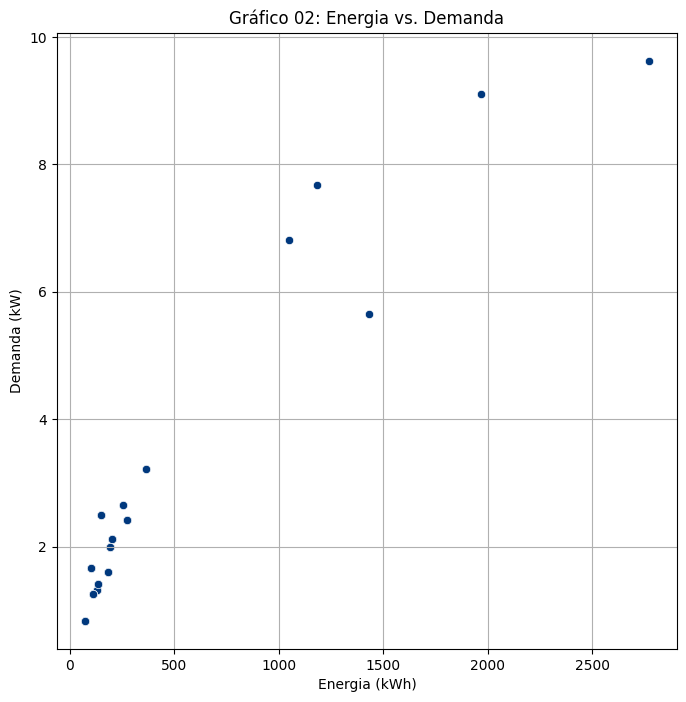

In [ ]:
# plotando a curva
plt.figure(figsize=(8,8))

sns.scatterplot(data=df_energia_demanda, x='energy', y='demand', color='#00387D', marker='o')

plt.title('Gráfico 02: Energia vs. Demanda')
plt.xlabel('Energia (kWh)')
plt.ylabel('Demanda (kW)')
plt.grid(True)
plt.show()

In [ ]:
# estimando tendência via Regressão Linear (mantendo os outliers)
X = np.array(df_energia_demanda['energy']).reshape(-1,1)
y = np.array(df_energia_demanda['demand']).reshape(-1,1)

reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

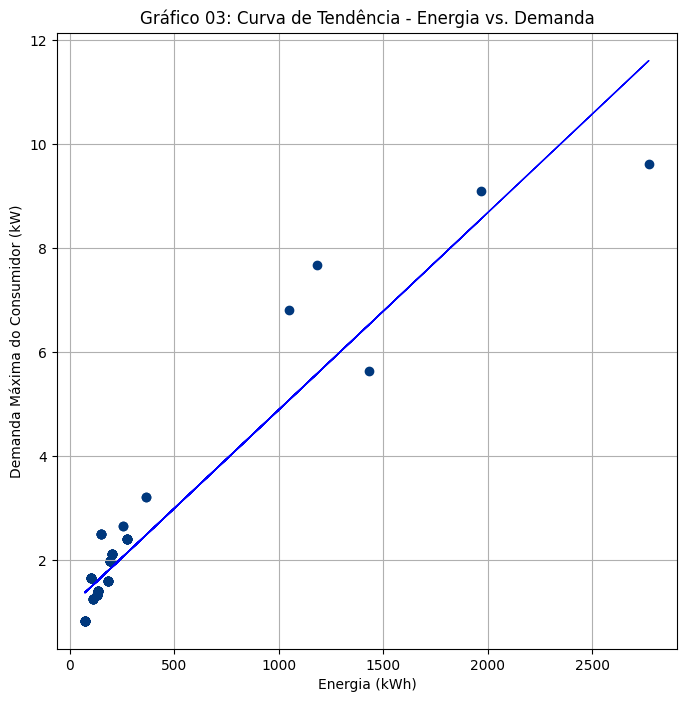

In [ ]:
# plotando a Regressão Linear
plt.figure(figsize=(8,8))

y_pred = reg.predict(X)

plt.scatter(df_energia_demanda['energy'], df_energia_demanda['demand'], color='#00387D')
plt.plot(X, y_pred, color="blue", linewidth=1)
plt.grid(True)
plt.title('Gráfico 03: Curva de Tendência - Energia vs. Demanda')
plt.xlabel('Energia (kWh)')
plt.ylabel('Demanda Máxima do Consumidor (kW)')
plt.show()

**Observações:** Não foram removidos os *outliers*.

In [ ]:
# funcao que descreve a curva de regressao linear
m = reg.coef_
b = reg.intercept_
print(f'y = {round(m[0][0],6)}x + {round(b[0],6)}')

y = 0.00379x + 1.101156


##### **Parte 2**

###### **3.8. Acesso a Rede**

Carregue a rede com o seguinte código: `1-LV-rural1-all-0-sw`

In [ ]:
sb_code_2 = '1-LV-rural1-all-0-sw'
net_2 = sb.get_simbench_net(sb_code_2)

In [ ]:
net_2.bus

,name,vn_kv,type,zone,in_service,max_vm_pu,substation,subnet,voltLvl,min_vm_pu
0,LV1.101 Bus 1,0.4,b,NaN,True,1.100,NaN,LV1.101,7,0.900
1,LV1.101 Bus 2,0.4,b,NaN,True,1.100,NaN,LV1.101,7,0.900
2,LV1.101 Bus 3,0.4,b,NaN,True,1.100,NaN,LV1.101,7,0.900
3,LV1.101 Bus 4,0.4,b,NaN,True,1.100,NaN,LV1.101,7,0.900
4,LV1.101 Bus 5,0.4,b,NaN,True,1.100,NaN,LV1.101,7,0.900
5,LV1.101 Bus 6,0.4,b,NaN,True,1.100,NaN,LV1.101,7,0.900
6,LV1.101 Bus 7,0.4,b,NaN,True,1.100,NaN,LV1.101,7,0.900
7,LV1.101 Bus 8,0.4,b,NaN,True,1.100,NaN,LV1.101,7,0.900
8,LV1.101 Bus 9,0.4,b,NaN,True,1.100,NaN,LV1.101,7,0.900
9,LV1.101 Bus 10,0.4,b,NaN,True,1.100,NaN,LV1.101,7,0.900


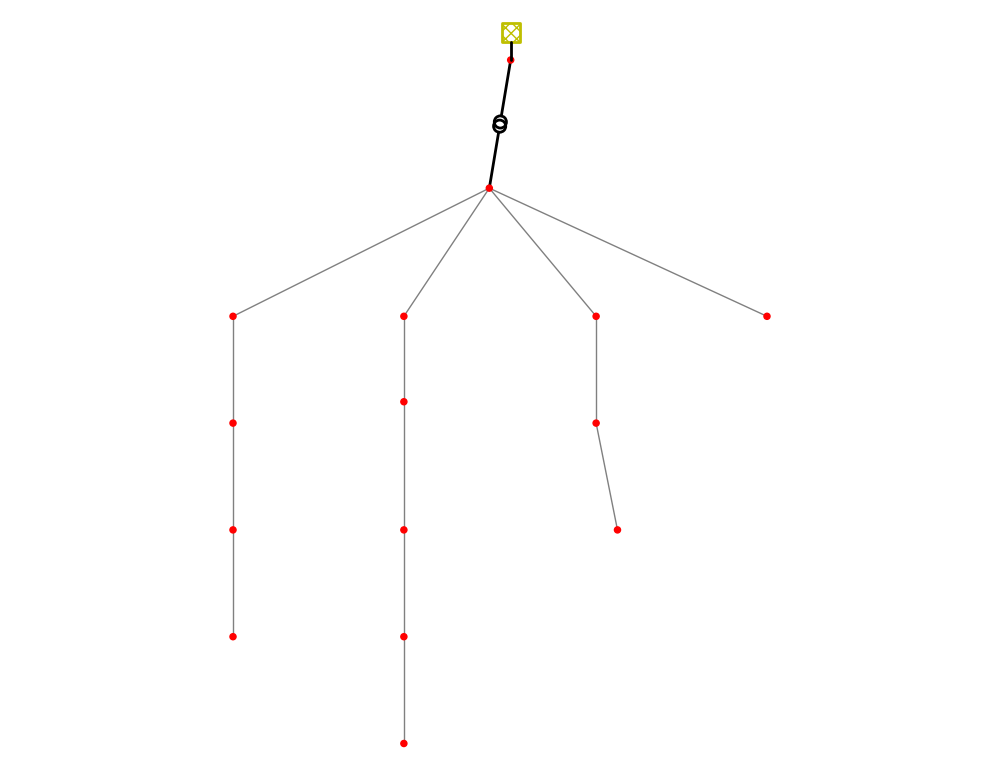

In [ ]:
plot.simple_plot(net_2, bus_size=0.5, bus_color='red')
plt.show()

**Observações:** A rede é composta por 13 consumidores (cargas).

###### **3.9. Cálculo das demandas máximas de cada consumidor**

Utilize o gráfico gerado no item 3 da parte 1 para calcular as demandas máximas de cada consumidor e compare com o valor real.

In [ ]:
def apply_absolute_values(net, absolute_values_dict, case_or_time_step):

    # loop nas chaves do dicionario de valores absolutos passado como parâmetro
    for elm_param in absolute_values_dict.keys():

        # verifica se o valor correspondente da chave do dicionario tem tamanho 1
        if absolute_values_dict[elm_param].shape[1]:
            elm = elm_param[0] # elemento: carga/geracao
            param = elm_param[1] # parametro: MW, MVAr
            net[elm].loc[:, param] = absolute_values_dict[
                                     elm_param].loc[
                                     case_or_time_step]

In [ ]:
# calcula os perfis de carga em valores absolutos
profiles = sb.get_absolute_values(net_2, profiles_instead_of_study_cases=True)

In [ ]:
# carrega o dataframe de dados a serem utilizados nos cálculos dos parâmetros
time_steps = range(3 * 30 * 96, 4 * 30 * 96)

results_lv_2 = pd.DataFrame([],
                          index = time_steps,
                          columns = net_2.load.name[net_2.load.name.str.contains('LV')])

for time_step in tqdm(time_steps):
    apply_absolute_values(net_2, profiles, time_step)
    pp.runpp(net_2)
    for i, load in enumerate(net_2.load.name[net_2.load.name.str.contains('LV')]):
        results_lv_2.loc[time_step, load] = net_2.res_load.p_mw[i]

  0%|          | 0/2880 [00:00<?, ?it/s]

In [ ]:
results_lv_2.head()

name,LV1.101 Load 1,LV1.101 Load 2,LV1.101 Load 3,LV1.101 Load 4,LV1.101 Load 5,LV1.101 Load 6,LV1.101 Load 7,LV1.101 Load 8,LV1.101 Load 9,LV1.101 Load 10,LV1.101 Load 11,LV1.101 Load 12,LV1.101 Load 13
8640,0.001053,0.000246,0.001126,0.000216,0.000702,0.000675,0.001801,0.002456,0.000526,0.002702,0.000062,0.000901,0.002456
8641,0.000984,0.000219,0.001041,0.000101,0.000656,0.000624,0.001665,0.002297,0.000492,0.002498,0.000056,0.000833,0.002297
8642,0.001048,0.000201,0.001082,0.000095,0.000698,0.000649,0.001731,0.002444,0.000524,0.002596,0.000059,0.000865,0.002444
8643,0.0011,0.000201,0.001007,0.000059,0.000733,0.000604,0.001612,0.002567,0.00055,0.002417,0.000062,0.000806,0.002567
8644,0.001095,0.000155,0.001061,0.000073,0.00073,0.000637,0.001698,0.002554,0.000547,0.002547,0.000062,0.000849,0.002554


**Demanda máxima de cada carga em MW**

In [ ]:
demanda_max_loads = results_lv_2.max(axis=0)
demanda_max_loads

name
LV1.101 Load 1     0.005295
LV1.101 Load 2     0.002412
LV1.101 Load 3     0.004125
LV1.101 Load 4     0.001409
LV1.101 Load 5      0.00353
LV1.101 Load 6     0.002475
LV1.101 Load 7     0.006599
LV1.101 Load 8     0.012354
LV1.101 Load 9     0.002647
LV1.101 Load 10    0.009899
LV1.101 Load 11    0.001326
LV1.101 Load 12      0.0033
LV1.101 Load 13    0.012354
dtype: object

**Dataframe de Demanda Máxima e Energia**

In [ ]:
# dataframe com a demanda máxima de cada consumidor
df_energia_demanda_2 = results_lv_2.max(axis=0).reset_index()

# renomeando coluna relativa a demanda
df_energia_demanda_2.rename(columns={0:'demand'}, inplace=True)

# renomeando a coluna relativa aos consumidores
df_energia_demanda_2.rename(columns={'name':'customer'}, inplace=True)

# adição da coluna com a energia
df_energia_demanda_2['energy'] = (results_lv_2*(1/4)).sum(axis=0).reset_index()[0]

df_energia_demanda_2

,customer,demand,energy
0,LV1.101 Load 1,0.005295,1.475503
1,LV1.101 Load 2,0.002412,0.272196
2,LV1.101 Load 3,0.004125,0.965334
3,LV1.101 Load 4,0.001409,0.133718
4,LV1.101 Load 5,0.00353,0.983668
5,LV1.101 Load 6,0.002475,0.5792
6,LV1.101 Load 7,0.006599,1.544535
7,LV1.101 Load 8,0.012354,3.442839
8,LV1.101 Load 9,0.002647,0.737751
9,LV1.101 Load 10,0.009899,2.316802


In [ ]:
# convertendo para kW
df_energia_demanda_2['demand'] = df_energia_demanda_2['demand']*1000
df_energia_demanda_2['energy'] = df_energia_demanda_2['energy']*1000

In [ ]:
df_energia_demanda_2

,customer,demand,energy
0,LV1.101 Load 1,5.294736,1475.502519
1,LV1.101 Load 2,2.411853,272.196395
2,LV1.101 Load 3,4.12465,965.33407
3,LV1.101 Load 4,1.408964,133.718475
4,LV1.101 Load 5,3.529824,983.668346
5,LV1.101 Load 6,2.47479,579.200442
6,LV1.101 Load 7,6.59944,1544.534512
7,LV1.101 Load 8,12.354384,3442.839211
8,LV1.101 Load 9,2.647368,737.75126
9,LV1.101 Load 10,9.89916,2316.801768


**Cálculo da Demanda Máxima dos Consumidores**

Aplicando a energia de cada consumidor na curva gerada pela regressão linear.

In [ ]:
x = df_energia_demanda_2['energy']

df_energia_demanda_2['demanda_calculada'] = 0.00379*x + 1.101156

In [ ]:
df_energia_demanda_2

,customer,demand,energy,demanda_calculada
0,LV1.101 Load 1,5.294736,1475.502519,6.693311
1,LV1.101 Load 2,2.411853,272.196395,2.13278
2,LV1.101 Load 3,4.12465,965.33407,4.759772
3,LV1.101 Load 4,1.408964,133.718475,1.607949
4,LV1.101 Load 5,3.529824,983.668346,4.829259
5,LV1.101 Load 6,2.47479,579.200442,3.296326
6,LV1.101 Load 7,6.59944,1544.534512,6.954942
7,LV1.101 Load 8,12.354384,3442.839211,14.149517
8,LV1.101 Load 9,2.647368,737.75126,3.897233
9,LV1.101 Load 10,9.89916,2316.801768,9.881835


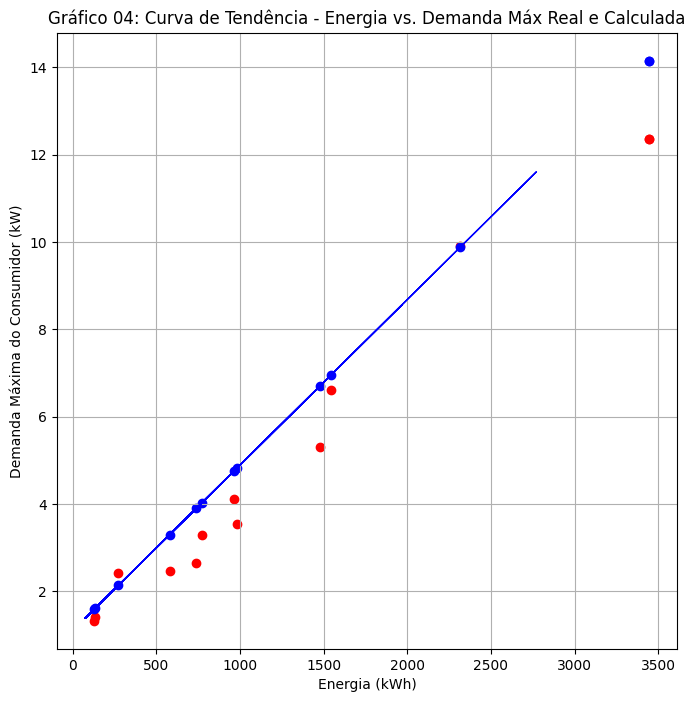

In [ ]:
plt.figure(figsize=(8,8))

y_pred = reg.predict(X)

plt.scatter(df_energia_demanda_2['energy'], df_energia_demanda_2['demand'], color='red')
plt.scatter(df_energia_demanda_2['energy'], df_energia_demanda_2['demanda_calculada'], color='blue')

plt.plot(X, y_pred, color="blue", linewidth=1)
plt.grid(True)
plt.title('Gráfico 04: Curva de Tendência - Energia vs. Demanda Máx Real e Calculada')
plt.xlabel('Energia (kWh)')
plt.ylabel('Demanda Máxima do Consumidor (kW)')
plt.show()

###### **3.10. Demanda Máxima Não-Coincidente Calculada**

In [ ]:
demanda_max_nc_calc = df_energia_demanda_2['demanda_calculada'].sum()
demanda_max_nc_real = df_energia_demanda_2['demand'].sum()

In [ ]:
print(f'A demanda máxima não coincidente calculada é {round(demanda_max_nc_calc,2)}kW')
print(f'A demanda máxima não coincidente real é {round(demanda_max_nc_real, 2)}kW')

A demanda máxima não coincidente calculada é 77.97kW
A demanda máxima não coincidente real é 67.73kW


###### **3.11. Demanda Máxima Diversificada Calculada**

Com o valor de **demanda máxima não-coincidente** encontrado no item anterior <mark>estime o valor de demanda máxima diversificada</mark> por meio da **tabela de fatores de diversidade encontrada** no item 1 da parte 1. Compare com o valor real de demanda diversificada para esta rede.

**Tabela de Fatores de Diversidade**

In [ ]:
df_fator_diversidade.head(20)

,numero-consumidores,fator-de-diversidade
0,1,1.000000
1,2,1.454375
2,3,1.818368
3,4,1.867912
4,5,1.725905
5,6,1.952018
6,7,1.593638
7,8,1.643171
8,9,1.821081
9,10,1.860609


**Número de consumidores e fator de diversidade atrelado**

In [ ]:
consumidores = len(df_energia_demanda_2)
fator_diversidade = df_fator_diversidade.loc[df_fator_diversidade['numero-consumidores'] == 13]['fator-de-diversidade'].values[0]

print(f'Para {consumidores} consumidores, o fator de diversidade é {round(fator_diversidade,3)}')

Para 13 consumidores, o fator de diversidade é 2.115


**Demanda Máxima Diversificada Calculada**

A fórmula para a **Demanda Máxima Diversificada**, é dada por:

$$
D = \frac{c}{fd}
$$

Sendo:

- D: Demanda Máxima Diversificada
- c: Demanda Máxima Não-Coincidente
- f: Fator de Diversidade

In [ ]:
demanda_diversificada_calculada = demanda_max_nc_calc/fator_diversidade
print(f'O valor da demanda máxima diversificada calculada é: {round(demanda_diversificada_calculada,2)}kW')

O valor da demanda máxima diversificada calculada é: 36.87kW


###### **3.12. Valor Real de Demanda Diversificada**

In [ ]:
demanda_div_real = df_energia_demanda_2['demand'].max()
print(f'O valor da demanda máxima diversificada real é {round(demanda_div_real, 2)}kW')

O valor da demanda máxima diversificada real é 12.35kW


#### **5. Resultados e Conclusão**

#### **6. Referências Bibliográficas**

<a name="cite_note-1"></a>[1] SHORT, T.A. *Electric Power Distribution Handbook*. CRC Press, 2004. [^](#cite_ref-1)